# X-Health 

## Objetivo

Este notebook tem como objetivo explorar o dataset da empresa **X-Health**, que atua no setor de vendas B2B de dispositivos eletrônicos voltados para a saúde.  

O principal objetivo é entender padrões nos dados e identificar fatores que possam estar relacionados à **inadimplência (`default`)**.

Assim, essa análise exploratória tem como objetivo responder às seguintes questões:
** Há padrões que parecem indicar risco de inadimplência?
** Os dados estão balanceados? Existem problemas nas amostragens?
** Como os valores ausentes impactam as análises?
** Quais variáveis têm maior correlação com default?

*  A descrição das variáveis:

    -  `default_3months` : Quantidade de default nos últimos 3 meses
    -  `ioi_36months`: Intervalo médio entre pedidos (em dias) nos últimos 36 meses
    -  `ioi_3months`: Intervalo médio entre pedidos (em dias) nos últimos 3 meses
    -  `valor_por_vencer`: Total em pagamentos a vencer do cliente B2B, em Reais
    -  `valor_vencido`: Total em pagamentos vencidos do cliente B2B, em Reais
    -  `valor_quitado`: Total (em Reais) pago no histórico de compras do cliente B2B 
    -  `quant_protestos` : Quantidade de protestos de títulos de pagamento apresentados no Serasa
    -  `valor_protestos` : Valor total (em Reais) dos protestos de títulos de pagamento apresentados no Serasa
    - `quant_acao_judicial` : Quantidade de ações judiciais apresentadas pelo Serasa
    -  `acao_judicial_valor` : Valor total das ações judiciais (Serasa) 
    -  `participacao_falencia_valor` : Valor total (em Reais) de falências apresentadas pelo Serasa
    -  `dividas_vencidas_valor` : Valor total de dívidas vencidas (Serasa)
    -  `dividas_vencidas_qtd` : Quantidade total de dívidas vencidas (Serasa)
    -  `falencia_concordata_qtd` : Quantidade de concordatas (Serasa)
    -  `tipo_sociedade` : Tipo de sociedade do cliente B2B 
    -  `opcao_tributaria` : Opção tributária do cliente B2B
    -  `atividade_principal` : Atividade principal do cliente B2B
    -  `forma_pagamento` : Forma de pagamento combinada para o pedido
    -  `valor_total_pedido` : Valor total (em Reais) do pedido em questão
    -  `month` : Mês do pedido
    -  `year` : Ano do pedido
    -  `default` : Status do pedido: default = 0 (pago em dia), default = 1 (pagamento não-realizado, calote concretizado)

    
    A coluna `default` é a variável alvo

Importando as bibliotecas e os pacotes necessários:

In [2]:
# Manipulação de arquivos e dados 
from pathlib import Path 
import pandas as pd
import numpy as np 

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Testes estatísticos
from statsmodels.stats.proportion import proportions_ztest

Para esse exercício, foi utilizado o dataset **"dataset_2021-5-26-10-14.csv"** presente na pasta **data** do repositório X-health. 

Carregando os dados: 

In [32]:
# identificando diretório base 
base_dir = Path.cwd()

# caminho para a pasta contendo o dataset  
data_dir = base_dir.parent / "data"

# caminho para o dataset 
df_path = data_dir / "dataset_2021-5-26-10-14.csv"

# importando o arquivo csv para um dataframe pandas
df = pd.read_csv(df_path, sep="\t", encoding="utf-8")

## Análise Exploratória dos Dados 

### 1 - Entendendo a Estrutura do Dataset

Visualização parcial do dataset: 

In [4]:
# visualizando as primeiras e últimas linhas do dataframe
df.head()
df.tail() 

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
117268,0,32.679779,16.582511,10470.620143,0.0,540673.324711,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.0,3373.145777,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.0,3362.163427,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.0,13889.897554,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1
117272,1,11.334081,15.431495,19281.291534,0.0,40008.605168,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,comercio,30/60/90,3584.906269,2,2018,1


 #### Variáveis e Entradas: 
  *  Verificando quantas entradas (linhas) e quantas variáveis (colunas) possui

In [15]:
print(f"O dataset contém {df.shape[0]} entradas e {df.shape[1]} variáveis")

O dataset contém 117273 entradas e 22 variáveis


*  Verificando os nomes das variáveis e seus tipos

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  int64  
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

*  Verificando número de valores/categorias distintas de cada variável e estatísticas descritivas de variáveis numéricas. 

In [17]:
# Análise descritiva 
for col in df.columns:
    col_data = df[col]

    print("_"*60)
    print(f"Coluna: {col}")
    print(f"Número de valores distintos: {col_data.nunique()}")

    if pd.api.types.is_numeric_dtype(col_data):
            display(col_data.describe())


____________________________________________________________
Coluna: default_3months
Número de valores distintos: 26


count    117273.000000
mean          0.148721
std           0.853794
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: default_3months, dtype: float64

____________________________________________________________
Coluna: ioi_36months
Número de valores distintos: 35593


count    117273.000000
mean         55.582906
std          60.989240
min           1.000000
25%          20.166667
50%          38.000000
75%          69.750000
max         951.000000
Name: ioi_36months, dtype: float64

____________________________________________________________
Coluna: ioi_3months
Número de valores distintos: 90


count    117273.000000
mean         17.077955
std          10.992574
min           1.000000
25%          11.000000
50%          16.000000
75%          18.000000
max          90.000000
Name: ioi_3months, dtype: float64

____________________________________________________________
Coluna: valor_por_vencer
Número de valores distintos: 81251


count    1.172730e+05
mean     6.421384e+04
std      5.252546e+05
min      0.000000e+00
25%      5.657400e+02
50%      4.451740e+03
75%      2.006296e+04
max      7.219759e+07
Name: valor_por_vencer, dtype: float64

____________________________________________________________
Coluna: valor_vencido
Número de valores distintos: 9944


count    1.172730e+05
mean     2.454043e+03
std      8.093313e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.315050e+07
Name: valor_vencido, dtype: float64

____________________________________________________________
Coluna: valor_quitado
Número de valores distintos: 92993


count    1.172730e+05
mean     1.085557e+06
std      7.444825e+06
min      0.000000e+00
25%      1.944250e+04
50%      8.134878e+04
75%      3.322643e+05
max      4.603203e+08
Name: valor_quitado, dtype: float64

____________________________________________________________
Coluna: quant_protestos
Número de valores distintos: 60


count    117273.000000
mean          0.240456
std          10.707825
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2324.000000
Name: quant_protestos, dtype: float64

____________________________________________________________
Coluna: valor_protestos
Número de valores distintos: 1828


count    1.172730e+05
mean     2.051017e+03
std      8.831758e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.630546e+07
Name: valor_protestos, dtype: float64

____________________________________________________________
Coluna: quant_acao_judicial
Número de valores distintos: 17


count    117273.000000
mean          0.018922
std           0.534034
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          80.000000
Name: quant_acao_judicial, dtype: float64

____________________________________________________________
Coluna: acao_judicial_valor
Número de valores distintos: 110


count    1.172730e+05
mean     9.218511e+02
std      4.861025e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.390986e+06
Name: acao_judicial_valor, dtype: float64

____________________________________________________________
Coluna: participacao_falencia_valor
Número de valores distintos: 1


count    117273.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: participacao_falencia_valor, dtype: float64

____________________________________________________________
Coluna: dividas_vencidas_valor
Número de valores distintos: 331


count    1.172730e+05
mean     5.603808e+02
std      8.459291e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.972251e+07
Name: dividas_vencidas_valor, dtype: float64

____________________________________________________________
Coluna: dividas_vencidas_qtd
Número de valores distintos: 20


count    117273.000000
mean          0.014974
std           0.397264
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: dividas_vencidas_qtd, dtype: float64

____________________________________________________________
Coluna: falencia_concordata_qtd
Número de valores distintos: 3


count    117273.000000
mean          0.000622
std           0.030759
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: falencia_concordata_qtd, dtype: float64

____________________________________________________________
Coluna: tipo_sociedade
Número de valores distintos: 17
____________________________________________________________
Coluna: opcao_tributaria
Número de valores distintos: 5
____________________________________________________________
Coluna: atividade_principal
Número de valores distintos: 204
____________________________________________________________
Coluna: forma_pagamento
Número de valores distintos: 105
____________________________________________________________
Coluna: valor_total_pedido
Número de valores distintos: 117273


count    1.172730e+05
mean     2.406180e+04
std      4.906680e+05
min     -7.446899e+02
25%      2.140419e+03
50%      4.012731e+03
75%      9.645923e+03
max      1.503340e+08
Name: valor_total_pedido, dtype: float64

____________________________________________________________
Coluna: month
Número de valores distintos: 12


count    117273.000000
mean          6.279169
std           3.194997
min           1.000000
25%           3.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: month, dtype: float64

____________________________________________________________
Coluna: year
Número de valores distintos: 3


count    117273.000000
mean       2017.976798
std           0.742185
min        2017.000000
25%        2017.000000
50%        2018.000000
75%        2019.000000
max        2019.000000
Name: year, dtype: float64

____________________________________________________________
Coluna: default
Número de valores distintos: 2


count    117273.000000
mean          0.166662
std           0.372676
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

*  As variáveis `ioi_3months` e `ioi_36months` podem ser transformadas em valores inteiros, por representarem dias. 

*  As variáveis  `month` e `year` também podem ser transformadas em valores inteiros, por representarem meses e anos. 

*  As variáveis que representam quantidade discretas (ex: número de ações judiciais, número de protestos) também podem ser transformados em valores inteiros.
 
*  Para facilitar a visualização, as colunas que possuem valores de grande amplitude podem ser transformadas em log. São elas: `valor_por_vencer`,     `valor_vencido`, `valor_quitado`, `valor_protestos`, `acao_judicial_valor`, `dividas_vencidas_valor` e `valor_total_pedido`.

*  A variável `participacao_falencia_valor` tem apenas o valor 0 para todas as linhas, portanto, pode ser excluída pois não traz informação nova para o modelo. 
  

In [20]:
# colunas que vão virar inteiras (e não precisam arredondar)
cols_para_int = ["default_3months", "quant_protestos", "quant_acao_judicial", "dividas_vencidas_qtd", "falencia_concordata_qtd", "month", "year"] 

df[cols_para_int] = df[cols_para_int].astype(int)

# Transformando em inteiro e arredondando 
df['ioi_3months'] = df['ioi_3months'].round().astype(int)
df['ioi_36months'] = df['ioi_36months'].round().astype(int)

In [25]:
# removendo a coluna com apenas um valor
df.drop(columns="participacao_falencia_valor", inplace=True)

KeyError: "['participacao_falencia_valor'] not found in axis"

In [ ]:
# colunas que terão valores log transformados
cols_to_log = ["valor_por_vencer","valor_vencido","valor_quitado", "valor_protestos", "acao_judicial_valor", "dividas_vencidas_valor", "valor_total_pedido"]

# criando novas colunas com o log dos valores
for col in cols_to_log:
    df[f"log_{col}"] = np.log1p(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  int64  
 2   ioi_3months                  117273 non-null  int64  
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

/home/maiara/miniconda3/envs/X-health-env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Análise da distribuição das variáveis financeiras

*  Verificação da distribuição de variáveis financeiras como `valor_por_vencer`, `valor_vencido`, `valor_quitado`, `valor_protestos`, `acao_judicial_valor`, `dividas_vencidas_valor` e `valor_total_pedido`. 

*  Essas variáveis apresentam valores muito dispersos, com grande parte dos dados concentrados em faixas menores e alguns casos extremamente altos (outliers). 
Por isso, foram feitos histogramas e boxplots, com e sem transformações (log).

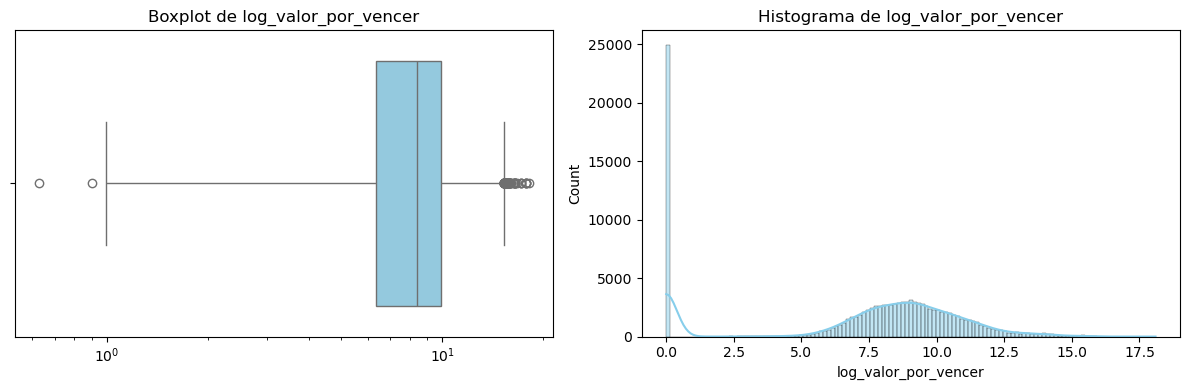

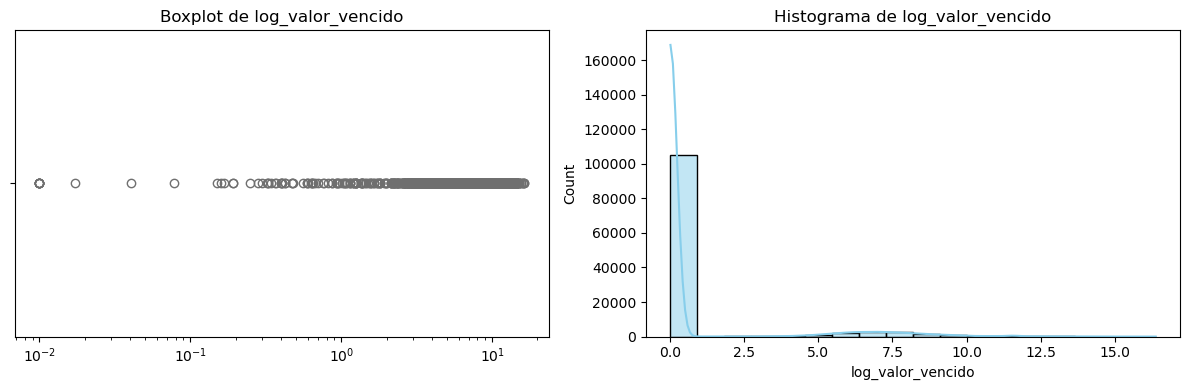

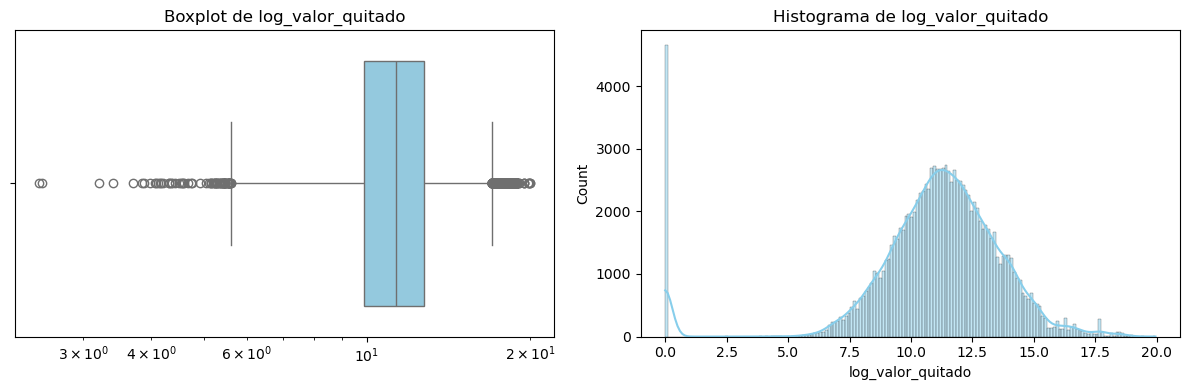

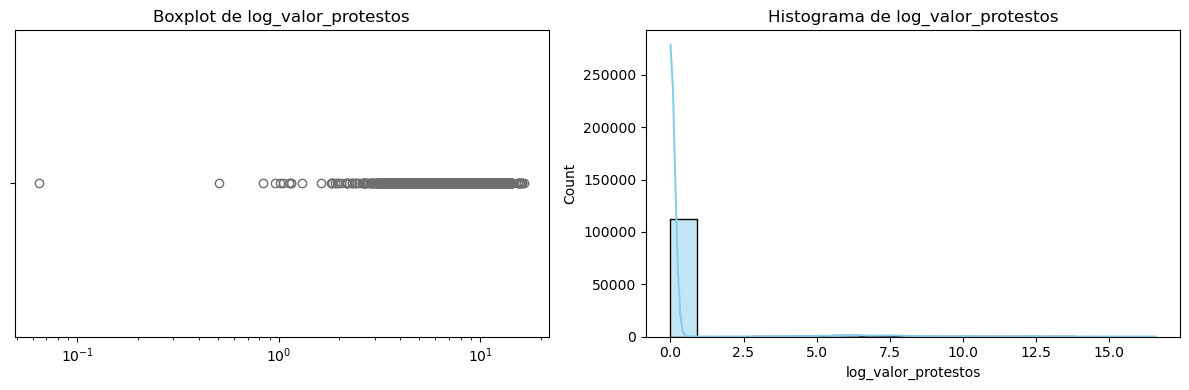

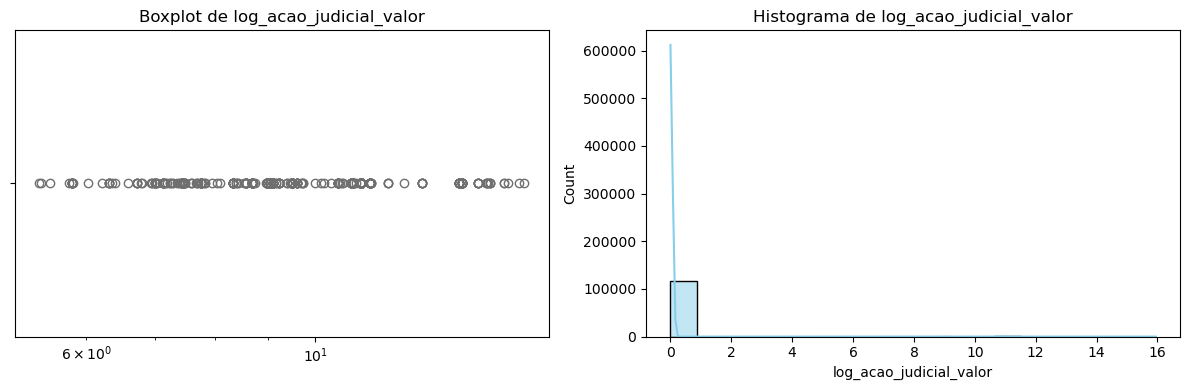

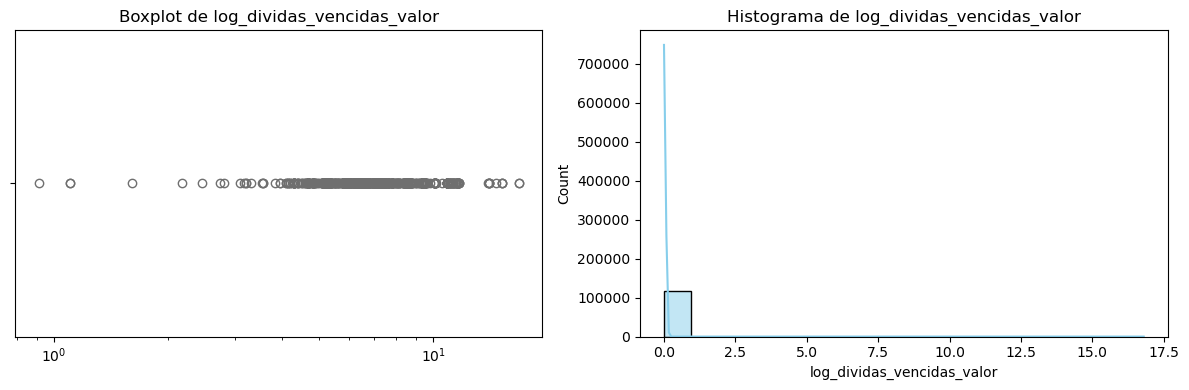

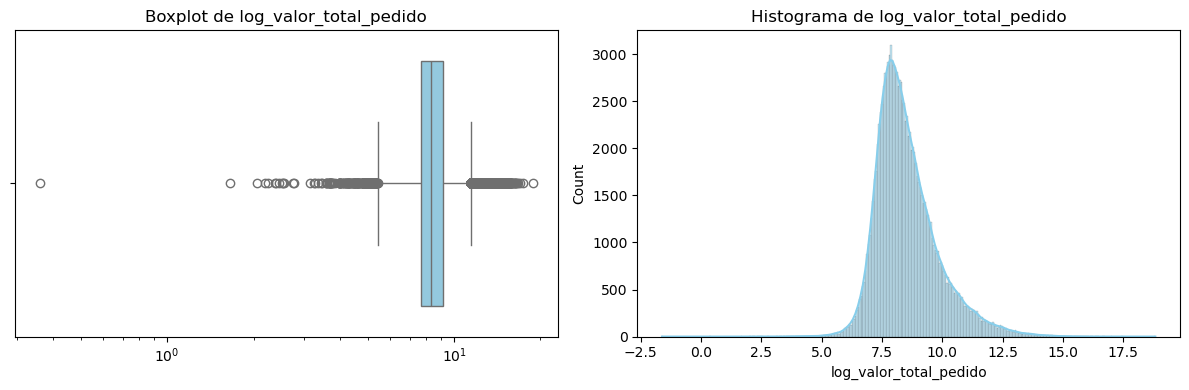

In [ ]:
# Analisar distribuição de algumas das variáveis numéricas relacionadas a valores

numeric_cols = ["log_valor_por_vencer","log_valor_vencido","log_valor_quitado", "log_valor_protestos", "log_acao_judicial_valor", "log_dividas_vencidas_valor", "log_valor_total_pedido"]


for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Boxplot (à esquerda)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot de {col}")
    plt.xscale("log")  
    plt.xlabel("")  
    
    # Histograma (à direita)
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=col, kde=True, color="skyblue")
    plt.title(f"Histograma de {col}")
    
    plt.tight_layout()
    plt.show()

    # ["default_3months", "ioi_36months", "ioi_3months", "valor_por_vencer","valor_vencido", "valor_quitado", "quant_protestos", "valor_protestos", 
    # "quant_acao_judicial", "acao_judicial_valor", "dividas_vencidas_valor","dividas_vencidas_qtd", "valor_total_pedido"]

*  Na análise exploratória, foi identificado que a variável `valor_total_pedido` possui valores negativos, que podem indicar **erros** ou **estornos**, porém não foi informado se existem estornos. 

*  Foi decidido pela remoção, para evitar que tais anomalias prejudiquem a visualização e o modelo.

In [40]:
negativos = df[df['valor_total_pedido'] < 0]

print(f"Total de registros com valor_total_pedido negativo: {len(negativos)}")
print(f"Percentual: {len(negativos)/len(df)*100:.2f}%")

Total de registros com valor_total_pedido negativo: 144
Percentual: 0.12%


In [30]:
# removendo registros com valor_total_pedido negativo
df = df[df['valor_total_pedido'] >= 0].copy()

*  Verificando a frequência de cada categoria das variáveis categóricas `tipo_sociedade`, `opcao_tributaria`, `atividade_principal` e `forma_pagamento`.

In [51]:
# Análise das categorias

# Lista de colunas categóricas
colunas_categoricas = ["tipo_sociedade", "opcao_tributaria", "atividade_principal", "forma_pagamento"]

# verificando a frequência absoluta e relativa para cada coluna
for coluna in colunas_categoricas:
    print(f"\ncoluna: {coluna}")

    df_freq = pd.DataFrame({
        "Freq absoluta": df[coluna].value_counts(),
        "Freq relativa (%)": df[coluna].value_counts(normalize=True) * 100
        })
    
    display(df_freq)



coluna: tipo_sociedade


,Freq absoluta,Freq relativa (%)
tipo_sociedade,,
sociedade empresaria limitada,60020,51.179726
empresario (individual),27055,23.070101
empresa individual respons limitada empresaria,19201,16.372908
empresario-mei(microempreendedor individual),6886,5.871769
sociedade anonima fechada,2482,2.116429
missing,608,0.518448
cooperativa,567,0.483487
sociedade simples limitada,121,0.103178
outras formas de associacao,106,0.090387



coluna: opcao_tributaria


,Freq absoluta,Freq relativa (%)
opcao_tributaria,,
simples nacional,87993,75.032616
missing,18325,15.625933
lucro real,7807,6.657116
lucro presumido,2757,2.350925
isento,391,0.333410



coluna: atividade_principal


,Freq absoluta,Freq relativa (%)
atividade_principal,,
com de equipamentos de informatica,22629,19.296002
com de telefones e equip p/ comunicacoes,9851,8.400058
papelaria,9075,7.738354
com de moveis e estofados,8226,7.014402
com de eletrodomesticos,8156,6.954713
...,...,...
sindicato de empregados,2,0.001705
bco mult priv nacional c/ partic estrangeira,2,0.001705
promocao de eventos,2,0.001705



coluna: forma_pagamento


,Freq absoluta,Freq relativa (%)
forma_pagamento,,
missing,32477,27.693501
30/60/90,29415,25.082500
30/60/90/120,7264,6.194094
28/42/56,6483,5.528127
28 dias,3375,2.877900
...,...,...
80/110/140/170/200/230,2,0.001705
110 dias,2,0.001705
36x (0+36),1,0.000853


Visualização da distribuição das categorias de cada variável categórica:

-  Algumas variáveis possuem uma quantidade substancial de categorias pouco representativas (baixo %). Para facilitar a visualização, estas categorias serão agrupadas em "Outros".

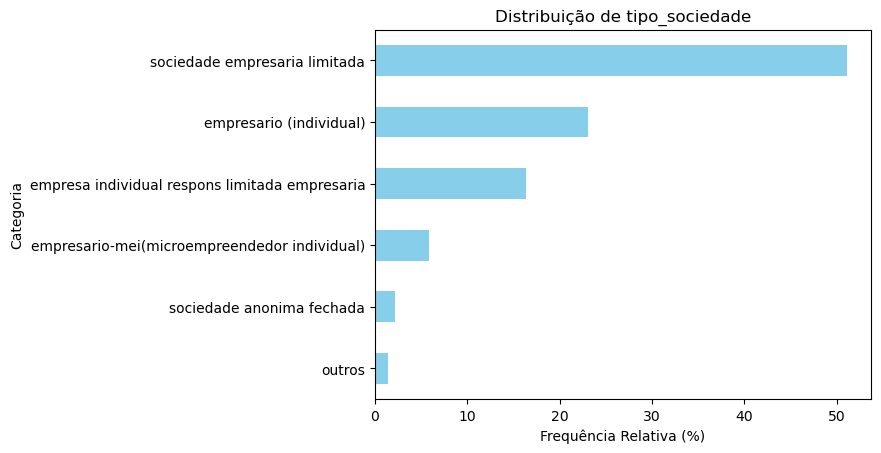

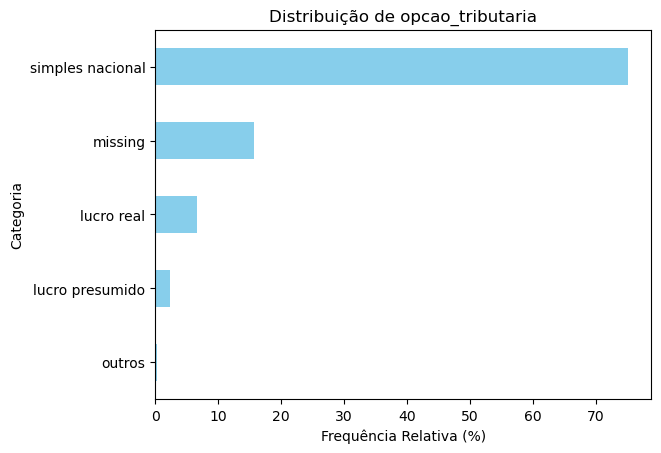

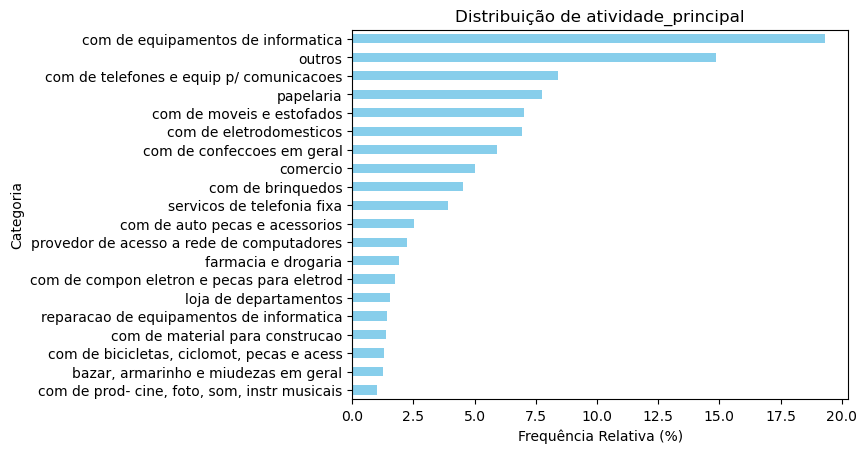

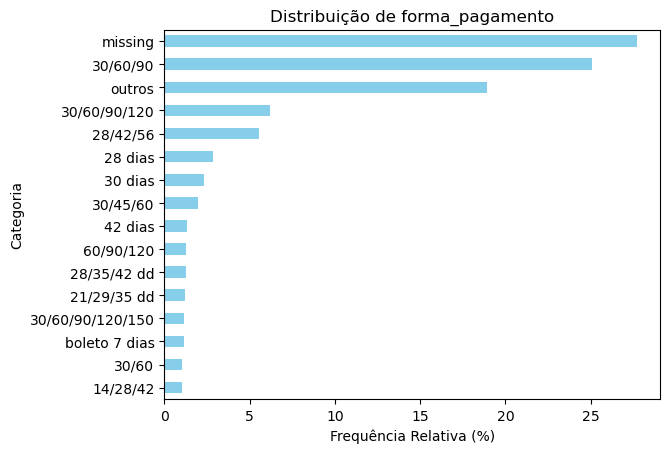

In [52]:
# DEfinindo um limiar de corte para categorias pouco representativas (1%) e agrupando em 'outros'
# Criando um gráfico de barras horizontal para visualizar a distribuição das categorias

cutoff = 0.01

for coluna in colunas_categoricas:

    # Frequência relativa de cada categoria
    freq_rel = df[coluna].value_counts(normalize=True)

    # Categorias que estão abaixo do ponto de corte
    categorias_raras = freq_rel[freq_rel < cutoff].index
    
    # Substitui essas categorias pouco representativas por 'outros'
    serie_agrupada = df[coluna].apply(lambda x: 'outros' if x in categorias_raras else x)

    freq_abs = serie_agrupada.value_counts()
    freq_rel = (freq_abs / freq_abs.sum() * 100).sort_values(ascending=True)

    freq_rel.plot(kind='barh', color='skyblue')
    plt.title(f"Distribuição de {coluna}", fontsize=12)
    plt.xlabel("Frequência Relativa (%)")
    plt.ylabel("Categoria")
    plt.show()

    

### Análise de valores ausentes

In [53]:
# verificando a contagem de valores ausentes 
df.isna().sum() 

default_3months                0
ioi_36months                   0
ioi_3months                    0
valor_por_vencer               0
valor_vencido                  0
valor_quitado                  0
quant_protestos                0
valor_protestos                0
quant_acao_judicial            0
acao_judicial_valor            0
participacao_falencia_valor    0
dividas_vencidas_valor         0
dividas_vencidas_qtd           0
falencia_concordata_qtd        0
tipo_sociedade                 0
opcao_tributaria               0
atividade_principal            0
forma_pagamento                0
valor_total_pedido             0
month                          0
year                           0
default                        0
dtype: int64

In [54]:
# verificando a contagem de valores "missing" 
(df == "missing").sum() 

default_3months                    0
ioi_36months                       0
ioi_3months                        0
valor_por_vencer                   0
valor_vencido                      0
valor_quitado                      0
quant_protestos                    0
valor_protestos                    0
quant_acao_judicial                0
acao_judicial_valor                0
participacao_falencia_valor        0
dividas_vencidas_valor             0
dividas_vencidas_qtd               0
falencia_concordata_qtd            0
tipo_sociedade                   608
opcao_tributaria               18325
atividade_principal              592
forma_pagamento                32477
valor_total_pedido                 0
month                              0
year                               0
default                            0
dtype: int64

As colunas `tipo_sociedade`, `opcao_tributaria`, `atividade_principal` e `forma_pagamento` contém valores ausentes "missing". 

In [55]:
# verificando % de valores missing por coluna
print("\nPercentual de Valores Missing por Coluna:")
df_missing = pd.DataFrame((df[colunas_categoricas] == "missing").mean() * 100, columns=["% de Missing"]).round(2)
display(df_missing)


Percentual de Valores Missing por Coluna:


,% de Missing
tipo_sociedade,0.52
opcao_tributaria,15.63
atividade_principal,0.50
forma_pagamento,27.69


Os resultados mostram que as colunas `tipo_sociedade` e `atividade_principal` apresentam apenas **~ 0.5%** de valores ausentes. 

Como o % é **baixo** (menos que 5%), uma abordagem válida é remover essas linhas.

Por outro lado, as colunas `opcao_tributaria` **(15.63%)** e `forma_pagamento` **(27.69)** apresentam percentuais elevados de valores missing, que podem ou não ser aleatórios. 

Quando uma variável tem muitos valores ausentes, é recomendado investigar **se essas ausências seguem algum padrão**, pois isso pode impactar as decisões do modelo.

Para isso, foi verificado qual o **tipo de "missing data"** em `opcao_tributaria` e `forma_pagamento`:

*  **MCAR (Missing Completely at Random**): A ausência ocorre sem qualquer padrão e não está relacionada a nenhuma variável. 
*  **MAR (Missing at Random)**: A ausência não é totalmente aleatória, mas está relacionada a outras variáveis no dataset.
*  **MNAR (Missing Not at Random)**: A ausencia não é aleatória, está relacionada ao próprio valor da variável ausente. 

In [56]:
# Removendo linhas com "missing" em `tipo_sociedade` e `atividade_principal` (~0.5%) 

df = df.loc[(df["tipo_sociedade"] != "missing") & (df["atividade_principal"] != "missing")].copy()

*  Criando colunas binárias indicadoras de ausência:

    *  Novas colunas `opcao_tributaria_missing` e `forma_pagamento_missing` indicando se os registros foram ausentes (1) ou não (0). 
    *  Serão utilizadas neste notebook para facilitar as visualizações.
    *  Modelos que não lidam bem com categorias ausentes (como Regressão Logística) poderão utilizar essa informação posteriormente. Também permite investigar diretamente se ter os valores ausentes está associado a uma maior probabilidade de default.

In [59]:
# Novas colunas binárias para indicar valores ausentes (1 = ausente, 0 = presente)
df["opcao_tributaria_missing"] = np.where(df["opcao_tributaria"] == "missing", 1, 0)
df["forma_pagamento_missing"] = np.where(df["forma_pagamento"] == "missing", 1, 0)

### Análises de valores ausentes e *default* 

Analisando se tem diferença na média de *default* nos casos em que os valores em `opcao_tributaria` e `forma_pagamento` estão preenchidos ou ausentes: 

In [57]:
# comparação de médias de default para valores missing e preenchidos em `opcao_tributaria` e `forma_pagamento` 

for col in ['opcao_tributaria', 'forma_pagamento']:
    
    missing = (df[col] == "missing")
    taxa_default_missing = df.loc[missing, 'default'].mean()
    taxa_default_preenchido = df.loc[~missing, 'default'].mean()

    print(f"\nColuna: {col}")
    print(f"Taxa default (missing) = {taxa_default_missing:.3f}")
    print(f"Taxa default (preenchido) = {taxa_default_preenchido:.3f}")


Coluna: opcao_tributaria
Taxa default (missing) = 0.095
Taxa default (preenchido) = 0.180

Coluna: forma_pagamento
Taxa default (missing) = 0.195
Taxa default (preenchido) = 0.156


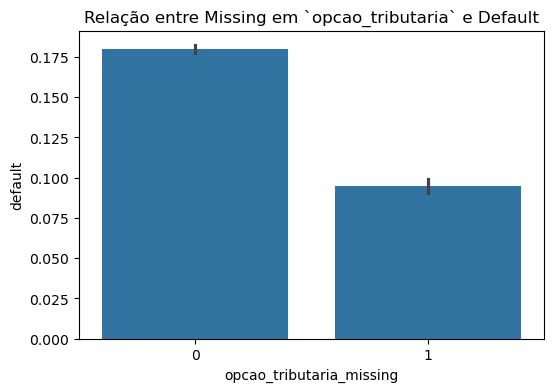

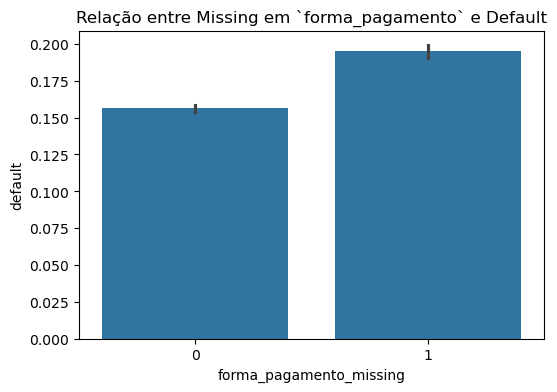

In [71]:
# Gráfico de barras para comparação de default para linhas com e sem missing

# variável `opcao_tributaria`
plt.figure(figsize=(6,4))
sns.barplot(x=df["opcao_tributaria_missing"], y=df["default"])
plt.title("Relação entre Missing em `opcao_tributaria` e Default")
plt.show()

# variável `forma_pagamento`
plt.figure(figsize=(6,4))
sns.barplot(x=df["forma_pagamento_missing"], y=df["default"])
plt.title("Relação entre Missing em `forma_pagamento` e Default")
plt.show()

*  Análise descritiva: os resultados de ambas as variáveis sugerem que a ausência de dados não é completamente aleatória (não parece ser MCAR). A taxa de default parece diferir entre quem tem e quem não tem a informação preenchida. 

In [69]:
for col in ['opcao_tributaria', 'forma_pagamento']:
    missing = (df[f"{col}_missing"] == 1)

    # somando default para o grupo missing 
    taxa_default_missing = df.loc[missing, 'default'].mean()
    missing_total = missing.sum()

    # somando default para o grupo preenchido
    taxa_default_preenchido = df.loc[~missing, 'default'].mean()
    preenchido_total = (~missing).sum()

    count = [taxa_default_missing, taxa_default_preenchido]
    nobs = [missing_total, preenchido_total]
    stat, pvalue = proportions_ztest(count, nobs)

    print(f"\nColuna: {col}")
    print(f"Estatística z: {stat:.4f}")
    print(f"p-valor: {pvalue:.4f}")



Coluna: opcao_tributaria
Estatística z: 0.2811
p-valor: 0.7786

Coluna: forma_pagamento
Estatística z: 0.3685
p-valor: 0.7125


#### Evolução da taxa de valores ausentes e inadiplência ao longo do tempo

Para entender se há um padrão entre inadiplência e dados ausentes, foi analisada a **evolução da taxa de missing (`opcao_tributaria` e `forma_pagamento`) e a taxa de *default*,** ao longo do tempo (2017-2019). 

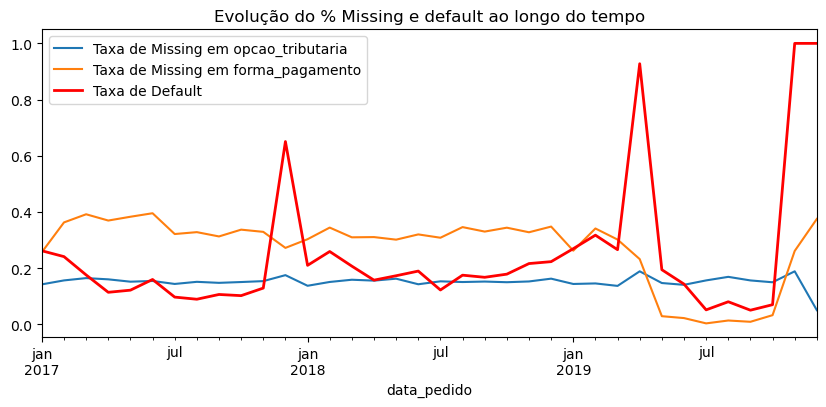

In [80]:
group_missing_opc = df.groupby('data_pedido')['opcao_tributaria_missing'].mean()
group_missing_forma = df.groupby('data_pedido')['forma_pagamento_missing'].mean()
group_default = df.groupby('data_pedido')['default'].mean()  # Taxa de default

plt.figure(figsize=(10,4))
group_missing_opc.plot(label='Taxa de Missing em opcao_tributaria')
group_missing_forma.plot(label='Taxa de Missing em forma_pagamento')
group_default.plot(label='Taxa de Default', color='red', linewidth=2)
plt.legend()
plt.title("Evolução do % Missing e default ao longo do tempo")
plt.show()

*  A taxa de valores ausentes em `opcao_tributaria` parece relativamente constante ao longo do tempo avaliado, com pequenas flutuações. 

*  A taxa de valores ausentes em `forma_pagamento` tem variações importantes. Em especial, em meados de 2019, a taxa despenca para próximo de zero, e depois sobe novamente. Esse comportamento não é aleatório e pode ser um caso de "missing data" do tipo MAR (Missing at Random) ou MNAR (Missing Not At Random). 

*  A queda na taxa de valores ausentes na `forma_pagamento` em 2019 pode indicar mudanças no processo de coleta de dados ou alguma política interna da empresa.

*  Houve momentos de redução na taxa de *default* (aprox maio/2019), coincidentes com a diminuição do missing em `forma_pagamento`, que pode sugerir possível relação entre as variáveis: ou seja, quando o cliente informa a forma de pagamento, a inadiplência tende a diminuir. 

### Verificação da quantidade de registros ao longo do tempo 

Identificar se a quantidade de registros é constante ao longo do tempo ou se há períodos com poucos registros, pois isso pode enviesar a análise. 

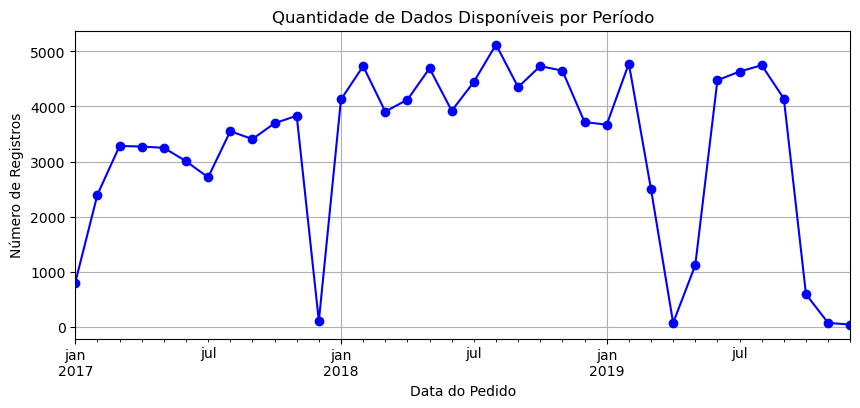

In [83]:
dados_por_periodo = df.groupby("data_pedido").size()

# Plotando a evolução do número de registros
plt.figure(figsize=(10,4))
dados_por_periodo.plot(marker="o", linestyle="-", color="blue")
plt.title("Quantidade de Dados Disponíveis por Período")
plt.xlabel("Data do Pedido")
plt.ylabel("Número de Registros")
plt.grid(True)
plt.show()

*  Foram identificados meses com poucos registros, especialmente entre dez/2017 e início 2018, bem como em meados de abril de 2019.

*  Os picos de inadimplência observados no gráfico anterior (Evolução da taxa de missing e inadiplência ao longo do tempo) podem ser um efeito de baixo volume de dados nesses períodos. 

Considerando o número elevado de valores missing nas variáveis (`opcao_tributaria` e `forma_pagamento`), e a aparente diferença de default entre missing vs. não missing, a abordagem será: 

*  Considerar "missing" uma categoria distinta: considerar os valores faltantes como uma nova categoria nessas variáveis. Dessa forma, poderá ser analisado se a ausência dos valores é um indicador de maior probabilidade de default. 


### Análise da distribuição da variável alvo (default)

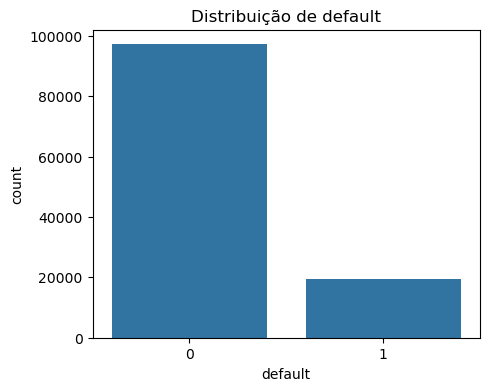

default
0    0.833003
1    0.166997
Name: proportion, dtype: float64


In [91]:
# Analisando a distribuição da variável alvo `default` 

plt.figure(figsize=(5,4))
sns.countplot(x='default', data=df)
plt.title('Distribuição de default')
plt.show()

# verificando a proporção 
print(df['default'].value_counts(normalize=True))

*  A partir desses resultados é possível observar que os dados estão desbalanceados, com 83.3% dos registros representando pagamentos efetivados (0) e 16,6% representando inadiplência (1). 

*  Assim, será necessário aplicar técnicas de balanceamento e utilizar métricas apropriadas. 

Análise de variáveis numéricas: 

In [1]:
numericas = df.select_dtypes(include='number').columns  # Seleciona colunas numéricas
print(numericas)


NameError: name 'df' is not defined

Correlação entre default e outras variáveis numéricas:
default            1.00000
default_3months    0.22092
Name: default, dtype: float64


Text(0.5, 1.0, 'Matriz de Correlação')

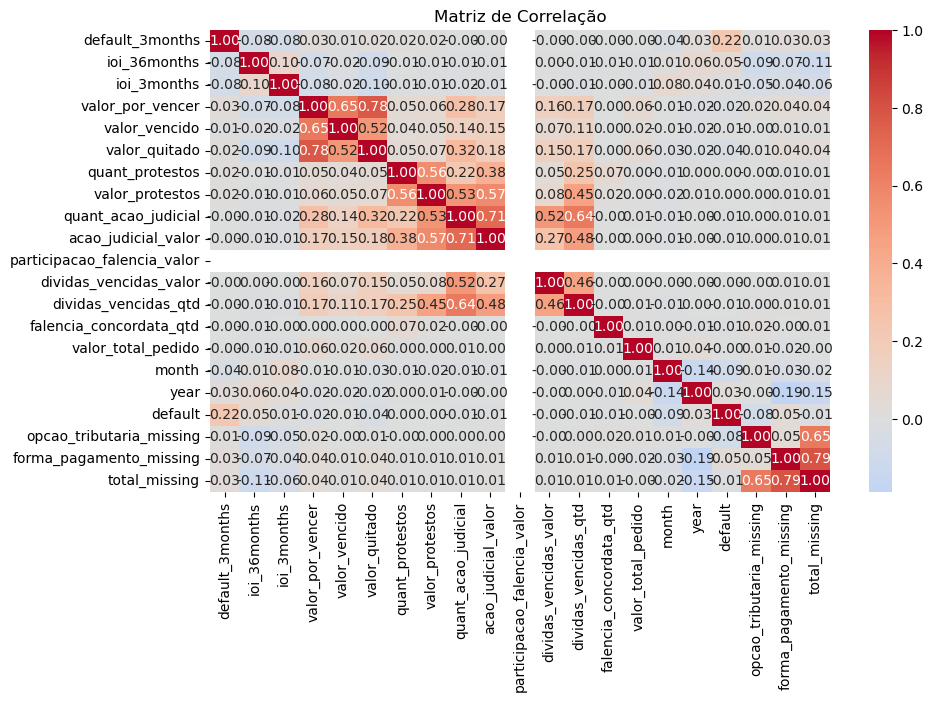

In [101]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

# Filtrar a correlação apenas com a variável `default`
correlation_default = correlation_matrix["default"].sort_values(ascending=False)

# Exibir as correlações mais fortes (> |0.1|)
print("Correlação entre default e outras variáveis numéricas:")
print(correlation_default[abs(correlation_default) > 0.1])

# Criar um heatmap da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")